In [2]:
import requests
import json
import pandas as pd
import numpy as np

In [3]:
# request = requests.get('https://api.tfl.gov.uk/Place/Type/BikePoint')

In [4]:
# bikes = request.json()

In [5]:
# len(bikes)

In [6]:
# with open('./bike_test_friday.json', 'w+') as f:
#     f.write(json.dumps(bikes, sort_keys=True, indent=4))

In [8]:
f = open('./data/bike_test_friday.json')

In [9]:
bikes = json.load(f)

In [10]:
print(bikes[1]['commonName'])
for  i in bikes[1]['additionalProperties']:
    print(i['key'], i['value'])
print('lat', bikes[1]['lat'])
print('long', bikes[1]['lon'])

Phillimore Gardens, Kensington
TerminalName 001018
Installed true
Locked false
InstallDate 1278585780000
RemovalDate 
Temporary false
NbBikes 14
NbEmptyDocks 23
NbDocks 37
lat 51.499606
long -0.197574


In [11]:
from datetime import datetime

In [12]:
datetime.now().year

2019

In [24]:
class BikeTimes():
    def __init__(self):
        self.date = datetime.now()
        self.hour = self.date.hour
        self.minute = self.date.minute
        self.url = 'https://api.tfl.gov.uk/Place/Type/BikePoint'
        self.data = requests.get(self.url).json()
        
    def save_data(self):
        with open(f'./bike_data_{self.hour}_{self.minute}.json', 'w+') as f:
            f.write(json.dumps(self.data, sort_keys = True, indent = 4))
        
        

In [8]:
BikeTimes().save_data()

In [14]:
bikes[0]

{'$type': 'Tfl.Api.Presentation.Entities.Place, Tfl.Api.Presentation.Entities',
 'additionalProperties': [{'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities',
   'category': 'Description',
   'key': 'TerminalName',
   'modified': '2019-11-08T14:11:23.83Z',
   'sourceSystemKey': 'BikePoints',
   'value': '001023'},
  {'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities',
   'category': 'Description',
   'key': 'Installed',
   'modified': '2019-11-08T14:11:23.83Z',
   'sourceSystemKey': 'BikePoints',
   'value': 'true'},
  {'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities',
   'category': 'Description',
   'key': 'Locked',
   'modified': '2019-11-08T14:11:23.83Z',
   'sourceSystemKey': 'BikePoints',
   'value': 'false'},
  {'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities',
   'category': 'Description',
   'key': 'InstallD

In [16]:
#cols = ['name', 'num_bikes', 'num_empty', 'num_docks', 'lat', 'lon']
bikes_list = []
for i in range(len(bikes)):
    name = bikes[i]['commonName']
    time = 't1'
    num_bikes = int(bikes[i]['additionalProperties'][-3]['value'])
    num_empty = int(bikes[i]['additionalProperties'][-2]['value'])
    num_docks = int(bikes[i]['additionalProperties'][-1]['value'])
    lat = bikes[i]['lat']
    lon = bikes[i]['lon']
    faulty = True if num_docks - num_empty - num_bikes > 0 else False
    
#     geo_test = requests.get(f"http://www.datasciencetoolkit.org/coordinates2statistics/{lat}%2c{lon}", params = {'statistics': 'population_density,elevation'}).json()
#     elevation = geo_test[0]['statistics']['elevation']['value']
#     pop_dens = geo_test[0]['statistics']['population_density']['value']
    
    bike_dict = {'name': name,
                 'time': time,
                 'num_bikes': num_bikes,
                 'num_empty': num_empty,
                 'num_docks': num_docks,
                 'coords': (lat,lon),
                 'faulty': faulty}
    
    bikes_list.append(bike_dict)

bikes_list[:5]

[{'name': 'River Street , Clerkenwell',
  'time': 't1',
  'num_bikes': 4,
  'num_empty': 15,
  'num_docks': 19,
  'coords': (51.529163, -0.10997),
  'faulty': False},
 {'name': 'Phillimore Gardens, Kensington',
  'time': 't1',
  'num_bikes': 14,
  'num_empty': 23,
  'num_docks': 37,
  'coords': (51.499606, -0.197574),
  'faulty': False},
 {'name': 'Christopher Street, Liverpool Street',
  'time': 't1',
  'num_bikes': 25,
  'num_empty': 6,
  'num_docks': 32,
  'coords': (51.521283, -0.084605),
  'faulty': True},
 {'name': "St. Chad's Street, King's Cross",
  'time': 't1',
  'num_bikes': 20,
  'num_empty': 3,
  'num_docks': 23,
  'coords': (51.530059, -0.120973),
  'faulty': False},
 {'name': 'New Globe Walk, Bankside',
  'time': 't1',
  'num_bikes': 7,
  'num_empty': 12,
  'num_docks': 19,
  'coords': (51.507385, -0.09644),
  'faulty': False}]

In [17]:
bikes_df = pd.DataFrame(bikes_list)

In [18]:
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False


In [19]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
name         780 non-null object
time         780 non-null object
num_bikes    780 non-null int64
num_empty    780 non-null int64
num_docks    780 non-null int64
coords       780 non-null object
faulty       780 non-null bool
dtypes: bool(1), int64(3), object(3)
memory usage: 37.4+ KB


In [20]:
geo_list = []
for bike in bikes_list:
    lat = bike['coords'][0]
    lon = bike['coords'][1]
    geo_test = requests.get(f"http://www.datasciencetoolkit.org/coordinates2statistics/{lat}%2c{lon}", params = {'statistics': 'population_density,elevation'}).json()
    elevation = geo_test[0]['statistics']['elevation']['value']
    pop_dens = geo_test[0]['statistics']['population_density']['value']
    geo_dict = {'coords': bike['coords'],
               'elevation': elevation,
               'pop_dens': pop_dens}
    geo_list.append(geo_dict)

In [21]:
geo_list[:5]

[{'coords': (51.529163, -0.10997), 'elevation': 31, 'pop_dens': 10010},
 {'coords': (51.499606, -0.197574), 'elevation': 17, 'pop_dens': 11436},
 {'coords': (51.521283, -0.084605), 'elevation': 27, 'pop_dens': 10010},
 {'coords': (51.530059, -0.120973), 'elevation': 22, 'pop_dens': 10010},
 {'coords': (51.507385, -0.09644), 'elevation': 16, 'pop_dens': 10010}]

In [22]:
geo_df = pd.DataFrame(geo_list).set_index('coords')

In [23]:
geo_df.head()

,elevation,pop_dens
coords,,
"(51.529163, -0.10997)",31,10010
"(51.499606, -0.197574)",17,11436
"(51.521283, -0.084605)",27,10010
"(51.530059, -0.120973)",22,10010
"(51.507385, -0.09644)",16,10010


In [25]:
high_pop = geo_df.pop_dens.quantile(.75)

In [26]:
geo_df['high_pop'] = geo_df.pop_dens > high_pop

In [27]:
geo_df.head()

,elevation,pop_dens,high_pop
coords,,,
"(51.529163, -0.10997)",31,10010,False
"(51.499606, -0.197574)",17,11436,True
"(51.521283, -0.084605)",27,10010,False
"(51.530059, -0.120973)",22,10010,False
"(51.507385, -0.09644)",16,10010,False


In [28]:
hill_list = []
for n in range(len(geo_df)):
    lat_n = geo_df.index[n][0]
    lon_n = geo_df.index[n][1]
#     print (lat_n,lon_n)
    elev_list = []
    for i in range(len(geo_df)):
        lat_i = geo_df.index[i][0]
        lon_i = geo_df.index[i][1]
#         print(lat_i,lon_i)
        bol = ((lat_n-lat_i)**2 + (lon_n - lon_i)**2 < 0.000005)
        if bol:
            elev_list.append(geo_df.iloc[i].elevation)
    hill = (geo_df.iloc[n].elevation > np.mean(elev_list))
    hill_list.append(hill)

In [29]:
hill_list[:5]

[False, False, False, True, False]

In [30]:
geo_df['hill'] = hill_list

In [31]:
geo_df.head()

,elevation,pop_dens,high_pop,hill
coords,,,,
"(51.529163, -0.10997)",31,10010,False,False
"(51.499606, -0.197574)",17,11436,True,False
"(51.521283, -0.084605)",27,10010,False,False
"(51.530059, -0.120973)",22,10010,False,True
"(51.507385, -0.09644)",16,10010,False,False


In [32]:
bikes_df = bikes_df.join(geo_df, on = 'coords')

In [33]:
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop,hill
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False


In [34]:
bikes_df['num_faulty'] = bikes_df.num_docks - (bikes_df.num_empty + bikes_df.num_bikes)

In [35]:
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop,hill,num_faulty
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False,0
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,0
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False,1
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True,0
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False,0


In [36]:
bikes_df.num_faulty.value_counts().sort

0    513
1    194
2     45
3     20
4      5
8      1
6      1
5      1
Name: num_faulty, dtype: int64

In [38]:
import seaborn as sns

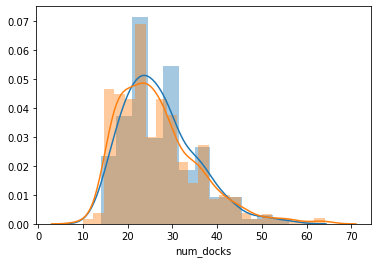

In [41]:
sns.distplot(bikes_df[bikes_df['high_pop'] == True].num_docks)
sns.distplot(bikes_df.num_docks)

In [42]:
def compare_dists(dataframe, subset_col, col):
    sns.distplot(dataframe[dataframe[subset_col] == True][col])
    sns.distplot(dataframe[col])

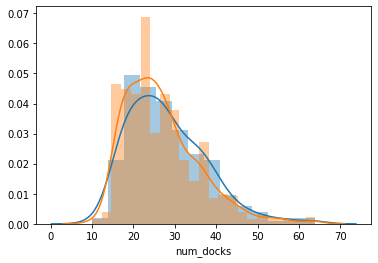

In [43]:
compare_dists(bikes_df, 'faulty', 'num_docks')

In [44]:
def compare_dists_logged(dataframe, subset_col, col):
    set_1 = dataframe[dataframe[subset_col] == True][col]
    set_2 = dataframe[col]
    sns.distplot(set_1.value_counts().apply(lambda x: np.log(x)))
    sns.distplot(set_2.value_counts().apply(lambda x: np.log(x)))

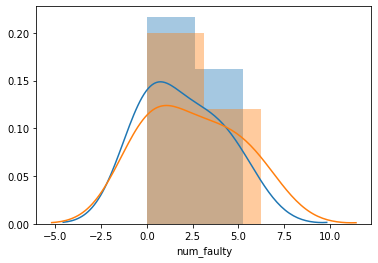

In [45]:
compare_dists_logged(bikes_df, 'faulty', 'num_faulty')

In [1]:
for n in range(len(bikes_df.head())):
    lat_n = bikes_df.coords[n][0]
    lon_n = geo_df.coords[n][1]
    print (lat_n,lon_n)
#     elev_list = []
#     for i in range(len(geo_df)):
#         lat_i = geo_df.index[i][0]
#         lon_i = geo_df.index[i][1]
# #         print(lat_i,lon_i)
#         bol = ((lat_n-lat_i)**2 + (lon_n - lon_i)**2 < 0.000005)
#         if bol:
#             elev_list.append(geo_df.iloc[i].elevation)
#     hill = (geo_df.iloc[n].elevation > np.mean(elev_list))
#     hill_list.append(hill)

NameError: name 'bikes_df' is not defined